In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read excel
def read_excel(path, sheet_name):
    df = pd.read_excel(path, sheet_name=sheet_name)
    return df

def draw_hex_contour(data, xindex, yindex):
    # Creating a hexbin plot with contours
    plt.close("all")
    plt.figure(figsize=(8, 6))

    # Create the hexbin plot
    hb = plt.hexbin(data[xindex], data[yindex], gridsize=30, cmap='Blues', mincnt=1)

    # Adding a color bar
    cb = plt.colorbar(hb)
    cb.set_label('Counts')

    # Adding titles and labels
    plt.title('Hexbin Contour Plot')
    plt.xlabel(xindex)
    plt.ylabel(yindex)
    plt.show()
    


In [3]:
df = read_excel("./Data_Collection_V3.xlsx", "Sheet1")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Data,Cement (kg/m3),Water (kg/m3),Fine Aggregate (kg/m3),Coarse Aggregate (kg/m3),HRWR (kg/m3),Fly ash (kg/m3),Slag (kg/m3),Silica Fume (kg/m3),nano-TiO2 (kg/m3),nano-SiO2 (kg/m3),Concrete Age (days),Curing Temperature (degC),Compressive Strength (Mpa)
1,0,200,180,774,1014,1.4,0,200,0,0,0,3,30,35.834
2,1,200,180,771,1014,1.7,0,192,8,0,0,3,30,37.017
3,2,200,180,771,1014,4,0,192,0,0,8,3,30,42.841
4,3,200,180,774,1014,1.4,0,200,0,0,0,7,30,47.391


In [5]:
# get columns names
column_names = list(df.iloc[0])[1:]
index_names = list(df.iloc[1:, 1])
print(column_names)

['Cement (kg/m3)', 'Water (kg/m3)', 'Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)', 'HRWR (kg/m3)', 'Fly ash (kg/m3)', 'Slag (kg/m3)', 'Silica Fume (kg/m3)', 'nano-TiO2 (kg/m3)', 'nano-SiO2 (kg/m3)', 'Concrete Age (days)', 'Curing Temperature (degC)', 'Compressive Strength (Mpa)']


In [6]:
values = df.iloc[1:, 1:].to_numpy()
values

array([[200, 180, 774, ..., 3, 30, 35.833999999999996],
       [200, 180, 771, ..., 3, 30, 37.017],
       [200, 180, 771, ..., 3, 30, 42.841],
       ...,
       [525, 196, 695, ..., 28, 23, 76.52],
       [525, 196, 695, ..., 28, 23, 87.24],
       [525, 196, 695, ..., 28, 23, 91.87]], dtype=object)

In [7]:
y1 = values[:, -1]
print(y1)



[35.833999999999996 37.017 42.841 47.391 49.574999999999996 55.308 65.5
 65.864 67.138 66.683 67.04700000000001 68.321 21.365000000000002 22.184
 26.643 29.191000000000003 30.829 35.47 42.75 43.205 47.937000000000005
 49.302 50.849 57.583 47.5 44 40.5 16.8 30.4 51.2 27.6 43.9 66.8 35 59
 81.1 54.4 75.8 87.9 71.6 85 91.2 85.7 92.2 96.3 95.4 104.5 103.7 108.5
 115.9 28.356021079999998 32.2998238 37.174419119999996 23.28837248
 23.79858472 26.749541999999998 22.7505812 36.20915272 26.21864548
 31.14839888 34.04419808 35.24388632 40.035744519999994 41.7801188
 52.41873348 40.80106288 42.1248568 46.075554280000006 26.9563848
 28.645601 33.7477234 32.658351319999994 46.35134468 37.07789248
 35.2645706 37.28473528 39.435900399999994 49.45398668 55.307637920000005
 64.38114208 29.3006032 30.734713279999998 31.2656098 20.178835720000002
 21.11652308 23.5434786 17.007246119999998 25.69464372 19.28251692
 26.42548828 28.86623332 29.852183999999998 31.27939932 31.79650632
 40.05642879999999 38.732

In [8]:
x = values[:, :12]

In [9]:
used_columns = column_names[1:]
print(used_columns)
new_df = pd.DataFrame(values[:, 1:], columns=used_columns, index=index_names)
new_df

['Water (kg/m3)', 'Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)', 'HRWR (kg/m3)', 'Fly ash (kg/m3)', 'Slag (kg/m3)', 'Silica Fume (kg/m3)', 'nano-TiO2 (kg/m3)', 'nano-SiO2 (kg/m3)', 'Concrete Age (days)', 'Curing Temperature (degC)', 'Compressive Strength (Mpa)']


,Water (kg/m3),Fine Aggregate (kg/m3),Coarse Aggregate (kg/m3),HRWR (kg/m3),Fly ash (kg/m3),Slag (kg/m3),Silica Fume (kg/m3),nano-TiO2 (kg/m3),nano-SiO2 (kg/m3),Concrete Age (days),Curing Temperature (degC),Compressive Strength (Mpa)
200.0,180,774,1014,1.4,0,200,0,0,0,3,30,35.834
200.0,180,771,1014,1.7,0,192,8,0,0,3,30,37.017
200.0,180,771,1014,4,0,192,0,0,8,3,30,42.841
200.0,180,774,1014,1.4,0,200,0,0,0,7,30,47.391
200.0,180,771,1014,1.7,0,192,8,0,0,7,30,49.575
...,...,...,...,...,...,...,...,...,...,...,...,...
525.0,196,695,753,7,70,105,0,0,7.875,7,23,80.5
630.0,196,695,753,5.6,70,0,0,0,0,28,23,71.14
525.0,196,695,753,5.6,70,105,0,0,0,28,23,76.52
525.0,196,695,753,7,70,105,0,0,2.625,28,23,87.24


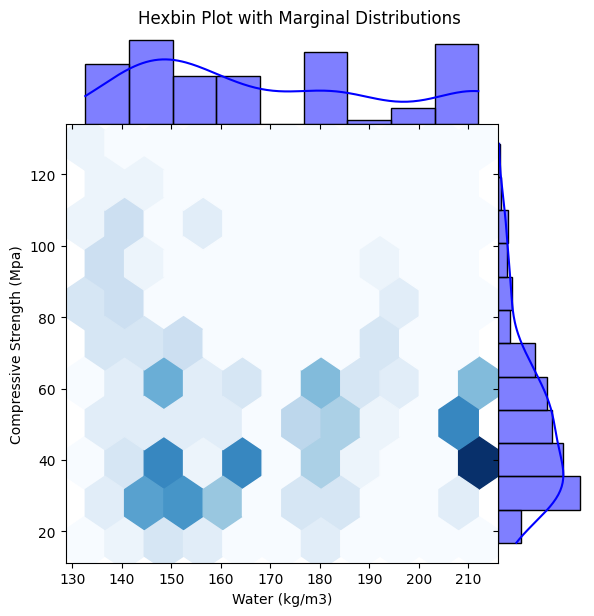

In [10]:
# draw hex_contour
def draw_hex_contour_marginal_dis(data, xindex, yindex):
    # Create the hexbin plot with marginal distributions
    g = sns.JointGrid(data=data, x=xindex, y=yindex, space=0)

    # Add the hexbin plot to the center
    g.plot_joint(plt.hexbin, gridsize=10, cmap='Blues')

    # Add the marginal histograms to the sides
#     g.plot_marginals(sns.histplot, kde=True, color="blue", bins=np.linspace(100,201, num=30))
    g.plot_marginals(sns.histplot, kde=True, color="blue")


    # Adding labels and title
    g.set_axis_labels(xindex, yindex)
    plt.suptitle("Hexbin Plot with Marginal Distributions", y=1.02)

    # Show the plot
    plt.show()

draw_hex_contour_marginal_dis(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa)")

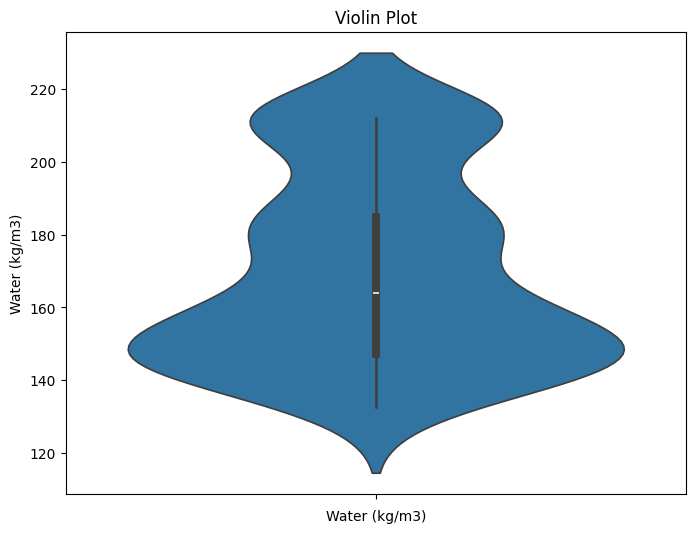

In [11]:
def draw_violin(data, xindex, yindex):
    # Create a violin plot
    plt.close("all")
    plt.figure(figsize=(8, 6))
    new_data = data.fillna(0)
    sns.violinplot(data=new_data, y=xindex)

    # Adding title and labels
    plt.title("Violin Plot")
    plt.xlabel(xindex)
#     plt.ylabel(yindex)
    
draw_violin(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa)")

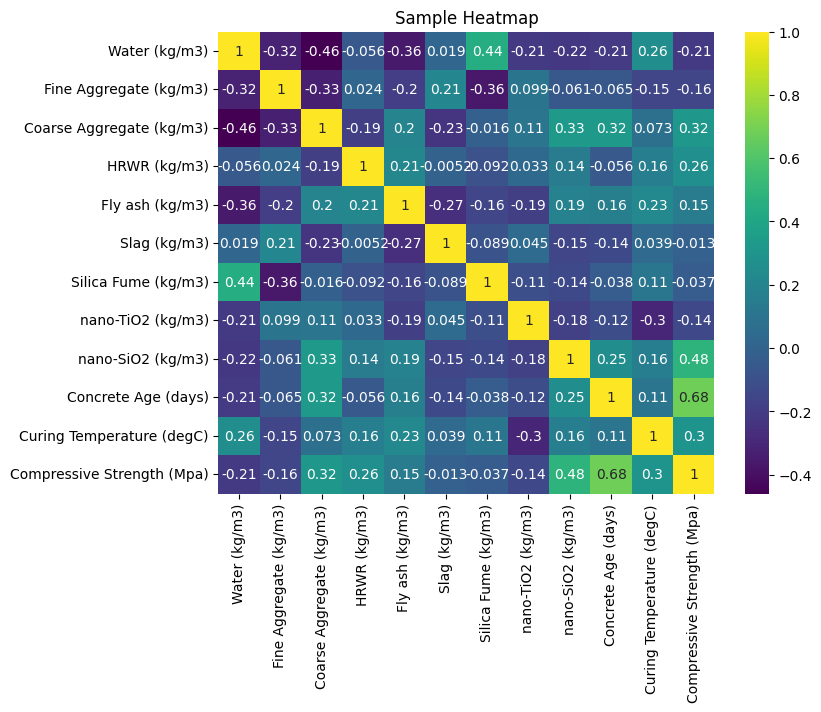

In [12]:
def draw_heatmap(data, xindex, yindex):
    # Create the heatmap
    new_data = data.fillna(0)
    corr_matrix = new_data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="viridis")

    # Adding title and labels
    plt.title("Sample Heatmap")
#     plt.xlabel(xindex)
#     plt.ylabel(yindex)

draw_heatmap(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa)")

In [13]:
x = values[:, :-1]
y = values[:, [-1]]

In [14]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## cross validation 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1, random_state=43)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.1, random_state=44)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.1, random_state=45)
X_train5, X_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.1, random_state=46)


In [15]:
from sklearn.metrics import r2_score

def calculate_rmse(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the RMSE
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))
    return rmse

def calculate_rmae(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the RMAE
    rmae = np.sqrt(np.mean(np.abs(actual - predicted)))
    return rmae

def calculate_r2(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the total sum of squares (SST) and residual sum of squares (SSR)
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    
    # Calculate R2
    r2 = 1 - (ss_residual / ss_total)
    return r2

def calculate_adjusted_r2(actual, predicted, num_predictors):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the total sum of squares (SST) and residual sum of squares (SSR)
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    
    # Calculate R2
    r2 = 1 - (ss_residual / ss_total)
    
    # Calculate Adjusted R2
    n = len(actual)  # Number of observations
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - num_predictors - 1)
    
    return adjusted_r2

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print("ridge regression for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train2, y_train2)
pred = reg.predict(X_test2)

print("ridge regression for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train3, y_train3)
pred = reg.predict(X_test3)

print("ridge regression for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train4, y_train4)
pred = reg.predict(X_test4)

print("ridge regression for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train5, y_train5)
pred = reg.predict(X_test5)

print("ridge regression for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


ridge regression for cross validation 1
rmse:  7.796098163796985
rmae:  2.400517634192265
R2:  0.7610237603689368

ridge regression for cross validation 2
rmse:  11.079853365752102
rmae:  2.803252489609413
R2:  0.5779798840491444

ridge regression for cross validation 3
rmse:  12.42557999052598
rmae:  3.0886862143148504
R2:  0.8371700187001188

ridge regression for cross validation 4
rmse:  10.813371004973542
rmae:  2.8785530843644773
R2:  0.8123346293538882

ridge regression for cross validation 5
rmse:  7.985750494786186
rmae:  2.361464424769747
R2:  0.8803092480206639



In [16]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print("lasso regression for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train2, y_train2)
pred = reg.predict(X_test2)

print("lasso regression for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train3, y_train3)
pred = reg.predict(X_test3)

print("lasso regression for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train4, y_train4)
pred = reg.predict(X_test4)

print("lasso regression for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train5, y_train5)
pred = reg.predict(X_test5)

print("lasso regression for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


lasso regression for cross validation 1
rmse:  20.3595386425779
rmae:  3.9954150806245656
R2:  0.7560010241963544

lasso regression for cross validation 2
rmse:  21.003708141662788
rmae:  4.112144320392802
R2:  0.5799189362983972

lasso regression for cross validation 3
rmse:  40.43310786243828
rmae:  5.645836956732216
R2:  0.8390203012836764

lasso regression for cross validation 4
rmse:  33.39724021891352
rmae:  5.041453997499358
R2:  0.8161636322948155

lasso regression for cross validation 5
rmse:  32.129761161059065
rmae:  4.818421999587612
R2:  0.8818685761847779



In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
pred = tree_regressor.predict(X_test)

print("decision tree for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train2, y_train2)
pred = tree_regressor.predict(X_test2)

print("decision tree for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train3, y_train3)
pred = tree_regressor.predict(X_test3)

print("decision tree for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train4, y_train4)
pred = tree_regressor.predict(X_test4)

print("decision tree for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train5, y_train5)
pred = tree_regressor.predict(X_test5)

print("decision tree for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


decision tree for cross validation 1
rmse:  22.119618403303363
rmae:  4.198264137396184
R2:  0.7494539116501977

decision tree for cross validation 2
rmse:  22.961698615292548
rmae:  4.294415826013126
R2:  0.650467419997405

decision tree for cross validation 3
rmse:  38.94418053246539
rmae:  5.511001168859845
R2:  0.9061321603573214

decision tree for cross validation 4
rmse:  33.47924117805415
rmae:  5.029724847462249
R2:  0.8850081728494357

decision tree for cross validation 5
rmse:  32.24824303746115
rmae:  4.859331084235065
R2:  0.7982493104438921



In [18]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
pred = tree_regressor.predict(X_test)

print("RandomForest for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train2, y_train2)
pred = tree_regressor.predict(X_test2)

print("RandomForest for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train3, y_train3)
pred = tree_regressor.predict(X_test3)

print("RandomForest for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train4, y_train4)
pred = tree_regressor.predict(X_test4)

print("RandomForest for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train5, y_train5)
pred = tree_regressor.predict(X_test5)

print("RandomForest for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


RandomForest for cross validation 1
rmse:  21.207903207474608
rmae:  4.090786388782101
R2:  0.9320906674802121

RandomForest for cross validation 2
rmse:  22.67922588136478
rmae:  4.260965312678826
R2:  0.8411197656473721



/home/tony/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/tony/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/tony/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/tony/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

RandomForest for cross validation 3
rmse:  39.845221291162346
rmae:  5.5534899797428166
R2:  0.935992857768908

RandomForest for cross validation 4
rmse:  33.820983145378555
rmae:  5.055945872609088
R2:  0.9077411695470085

RandomForest for cross validation 5
rmse:  30.98377373878197
rmae:  4.775719934369073
R2:  0.9604917589399705



/home/tony/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [19]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

tree_regressor = SVR()
tree_regressor.fit(X_train, y_train.flatten())
pred = tree_regressor.predict(X_test)

print("SVR for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train2, y_train2.flatten())
pred = tree_regressor.predict(X_test2)

print("SVR for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train3, y_train3.flatten())
pred = tree_regressor.predict(X_test3)

print("SVR for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train4, y_train4.flatten())
pred = tree_regressor.predict(X_test4)

print("SVR for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

tree_regressor = RandomForestRegressor(random_state=42)
tree_regressor.fit(X_train5, y_train5.flatten())
pred = tree_regressor.predict(X_test5)

print("SVR for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


SVR for cross validation 1
rmse:  16.01102081487856
rmae:  3.8195782802942735
R2:  0.06996986817978657

SVR for cross validation 2
rmse:  22.67922588136478
rmae:  4.260965312678826
R2:  0.8411197656473721

SVR for cross validation 3
rmse:  39.845221291162346
rmae:  5.5534899797428166
R2:  0.935992857768908

SVR for cross validation 4
rmse:  33.820983145378555
rmae:  5.055945872609088
R2:  0.9077411695470085

SVR for cross validation 5
rmse:  30.98377373878197
rmae:  4.775719934369073
R2:  0.9604917589399705



In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        """
        input_size: Number of input features
        hidden_sizes: List containing the sizes of each hidden layer
        output_size: Number of output features
        """
        super(MLP, self).__init__()
        
        # Define the first layer from input to first hidden layer
        layers = [nn.Linear(input_size, hidden_sizes[0])]
        
        # Create the hidden layers dynamically based on hidden_sizes
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        
        # Append the final layer that maps the last hidden layer to the output
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        # Store the layers in an nn.ModuleList
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        # Pass the input through each layer, applying ReLU after each layer except the output
        for i in range(len(self.layers) - 1):
            x = F.relu(self.layers[i](x))
        
        # Output layer (without activation, useful for regression)
        x = self.layers[-1](x)
        
        return x

In [21]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test.astype(np.float32)))

print("ANN for cross validation 1")
print("rmse: ", calculate_rmse(y_test, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test, y_pred.detach().numpy()))
print()

ANN for cross validation 1
rmse:  4.553349165236742
rmae:  1.8750097494314983
R2:  0.9184804009978987



In [22]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train2.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train2.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test2.astype(np.float32)))

print("ANN for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test2, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test2, y_pred.detach().numpy()))
print()

ANN for cross validation 2
rmse:  4.511494023803608
rmae:  1.8591737967248623
R2:  0.9300309625237168



In [23]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train3.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train3.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test3.astype(np.float32)))


print("ANN for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test3, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test3, y_pred.detach().numpy()))
print()

ANN for cross validation 3
rmse:  6.338264266467966
rmae:  2.2113310648130713
R2:  0.9576316335950197



In [24]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train4.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train4.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test4.astype(np.float32)))


print("ANN for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test4, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test4, y_pred.detach().numpy()))
print()

ANN for cross validation 4
rmse:  7.065968546119728
rmae:  2.310362062161917
R2:  0.9198681198167844



In [25]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train5.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train5.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test5.astype(np.float32)))

print("ANN for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test5, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test5, y_pred.detach().numpy()))
print()

ANN for cross validation 5
rmse:  5.152522435731789
rmae:  1.9064471422147118
R2:  0.9501725221878281



In [26]:
!pip install captum

In [27]:
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

(185, 12)
IG Attributions: torch.Size([185, 12])
Convergence Delta: torch.Size([185])


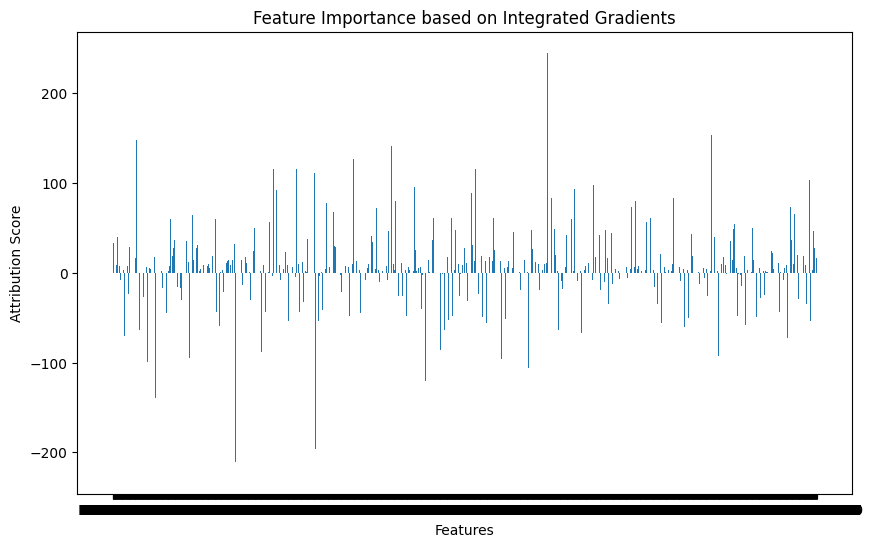

In [28]:
ig = IntegratedGradients(model)
print(X_train.shape)
baseline = torch.zeros_like(torch.from_numpy(X_train.astype(np.float32)))
attributions, delta = ig.attribute(torch.from_numpy(X_train.astype(np.float32)), baseline, target=0, return_convergence_delta=True)
print('IG Attributions:', attributions.shape)
print('Convergence Delta:', delta.shape)

# Visualize the attributions using a bar plot
def visualize_attributions(attributions):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(attributions)), attributions, tick_label=[f'Feature {i}' for i in range(len(attributions))])
    plt.xlabel('Features')
    plt.ylabel('Attribution Score')
    plt.title('Feature Importance based on Integrated Gradients')
    plt.show()

attributions = attributions.detach().numpy().flatten()
visualize_attributions(attributions)

In [29]:
# imports from captum library
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

ig = IntegratedGradients(model)
ig_nt = NoiseTunnel(ig)
dl = DeepLift(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

In [30]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))

ig_attr_test = ig.attribute(X_test_tensor, n_steps=50)
ig_nt_attr_test = ig_nt.attribute(X_test_tensor)
dl_attr_test = dl.attribute(X_test_tensor)
gs_attr_test = gs.attribute(X_test_tensor, X_train_tensor)
fa_attr_test = fa.attribute(X_test_tensor)

/home/tony/anaconda3/lib/python3.11/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/tony/anaconda3/lib/python3.11/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


13


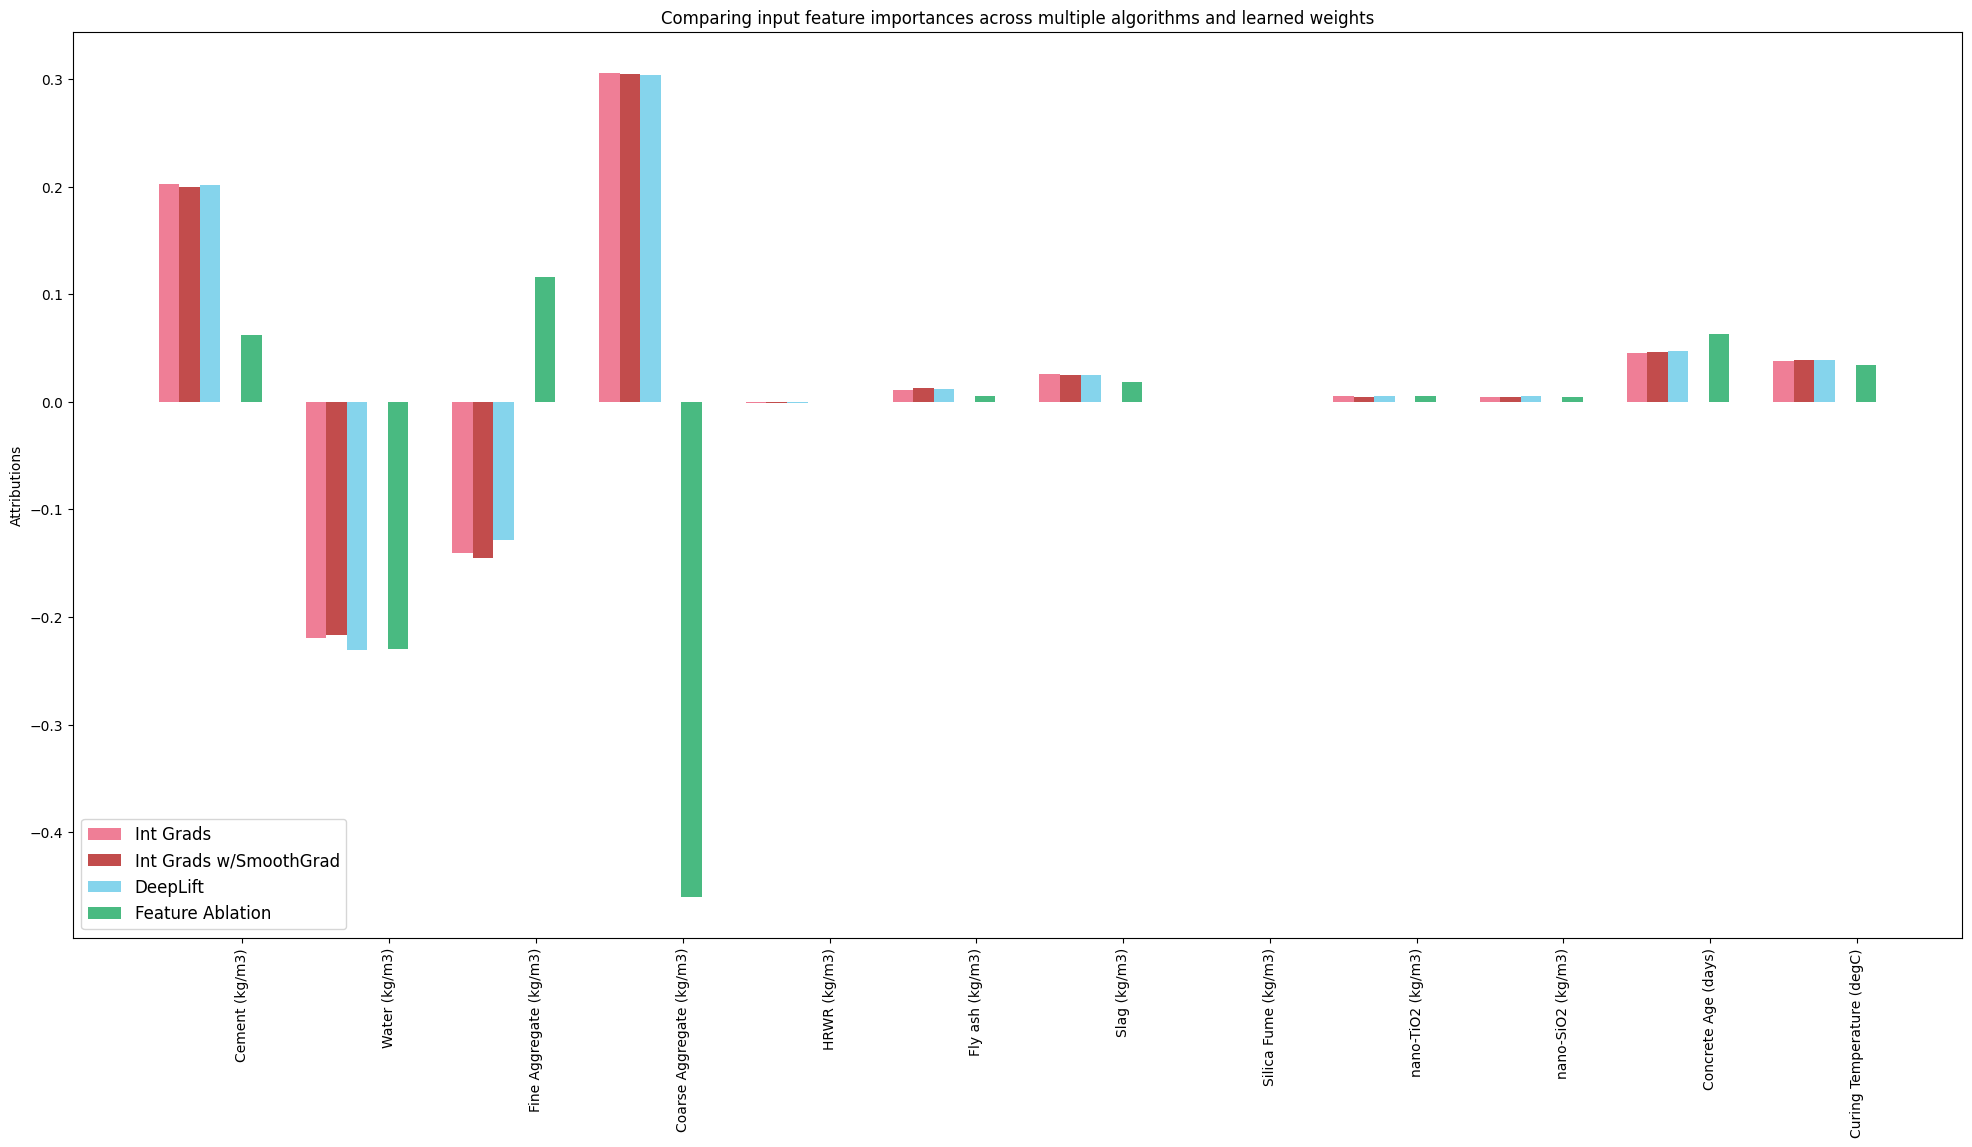

In [31]:
# prepare attributions for visualization
feature_names = column_names
print(len(feature_names))

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

ig_nt_attr_test_sum = ig_nt_attr_test.detach().numpy().sum(0)
ig_nt_attr_test_norm_sum = ig_nt_attr_test_sum / np.linalg.norm(ig_nt_attr_test_sum, ord=1)

dl_attr_test_sum = dl_attr_test.detach().numpy().sum(0)
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum, ord=1)

# gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
# gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

# lin_weight = model.Linear.weight[0].detach().numpy()
# y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
# legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift', 'GradientSHAP', 'Feature Ablation', 'Weights']
legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift',  'Feature Ablation', 'Weights']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, ig_nt_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, dl_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
# ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
# ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels, rotation=90)

plt.legend(legends, loc=3)
plt.show()